# Singapore Supercomputing Virtual Forum Qiskit Demo
- **Huang Junye**
- Quantum Developer Advocate
- IBM Quantum & Qiskit community team
- *June 30, 2020*

# Outline
- Qiskit elements
- Basic concepts in quantum computing
    - Superposition
    - Measurement
    - Entanglement
    - Quantum gates
    - Interference
- Algorithm
    - Grover Optimizer

# Qiskit elements
![Qiskit elements](figures/qiskit_elements.png)

# Basic concepts in Quantum Computing

- Superposition
- Measurement
- Entanglement
- Quantum gates
- Interference

## Superposition
Superposition is creating a quantum state that is a combination of $|0\rangle$ and $|1\rangle$: $|\psi\rangle = a|0\rangle+b|1\rangle$.

<img src="figures/Schrodingers_cat.svg" alt="Schrodinger's cat" style="width: 1200px;"/>

### Import Qiskit

In [1]:
from qiskit import QuantumCircuit, execute # for creating and executing quantum circuits
from qiskit.visualization import iplot_state_qsphere, plot_histogram # for visualization
%config InlineBackend.figure_format = 'svg' # make images look nice

### Create a quantum circuit

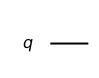

In [2]:
qc0 = QuantumCircuit(1) # create a quantum circuit with 1 qubit
qc0.draw('mpl') # visualize the circuit 

In [3]:
from qiskit.providers.aer import StatevectorSimulator 
# StatevectorSimulator returns final quantum statevector of the circuit

state0 = execute(qc0, StatevectorSimulator()).result().get_statevector() # execute simulation
iplot_state_qsphere(state0) # visualize statevector in a qsphere

### Add quantum gates

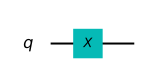

In [4]:
qc1 = QuantumCircuit(1)
qc1.x(0) # apply X gate to qubit 0
qc1.draw('mpl')

In [5]:
state1 = execute(qc1, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state1)

### Create superposition

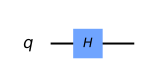

In [6]:
qc2 = QuantumCircuit(1)
qc2.h(0) # apply Hadamard gate to qubit 0
qc2.draw('mpl')

In [7]:
state2 = execute(qc2, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state2)

## Measurement
Measurement is an action that forces a qubit to either $|0\rangle$ or $|1\rangle$ based on probability. For state $|\psi\rangle = a|0\rangle+b|1\rangle$:

- $|a|^2$ is the probability we will get $|0\rangle$ when we measure
- $|b|^2$ is the probability we will get $|1\rangle$ when we measure

![Schrodinger cat measurement](figures/schrodingers_cat_measurement.png)

### Add measurement operation

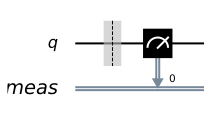

In [8]:
qc0.measure_all() # measure all qubits and store the result in classical bits
qc0.draw('mpl')

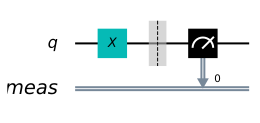

In [9]:
qc1.measure_all()
qc1.draw('mpl')

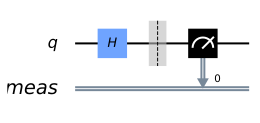

In [10]:
qc2.measure_all()
qc2.draw('mpl')

### Measurement statistics

In [11]:
from qiskit.providers.aer import QasmSimulator # QasmSimulator micmic beheaviour of real devices

# real devices require multiple execution (shots, default=1024) to obtain outcome statistics
counts0 = execute(qc0, QasmSimulator(), shots=1000).result().get_counts()
counts1 = execute(qc1, QasmSimulator(), shots=1000).result().get_counts()
counts2 = execute(qc2, QasmSimulator(), shots=1000).result().get_counts()
print(counts0, counts1, counts2)

{'0': 1000} {'1': 1000} {'0': 511, '1': 489}


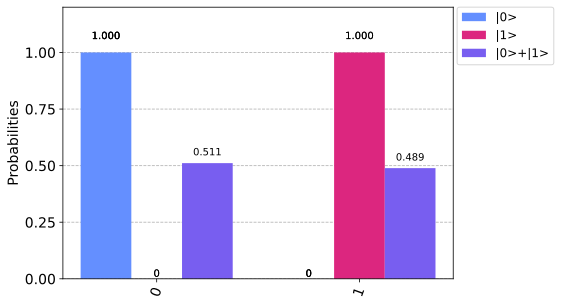

In [12]:
plot_histogram([counts0, counts1, counts2], legend=['|0>','|1>','|0>+|1>']) # visualize outcome statistics

## Entanglement
Entanglement strongly connects two or more qubits so that their quantum states are no longer independent.

<center><img src="figures/quantum_entanglement.jpg" alt="Quantum entanglement" style="width: 1000px;"/></center>

### Hadamard with 2 qubits

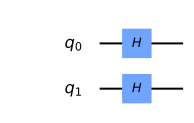

In [13]:
qc4 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc4.h(0)
qc4.h(1)
qc4.draw('mpl')

In [14]:
state4 = execute(qc4, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state4) # plot the cityscape of quantum state

### Bell state $|\phi\rangle = 1 / \sqrt{2}(|00\rangle + |11\rangle)$ 

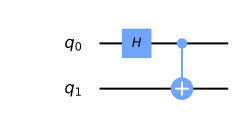

In [15]:
qc5 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc5.h(0)
qc5.cx(0,1) # apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc5.draw('mpl')

In [16]:
state5 = execute(qc5, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state5) # plot the cityscape of quantum state

### Measurement statistics for Bell state

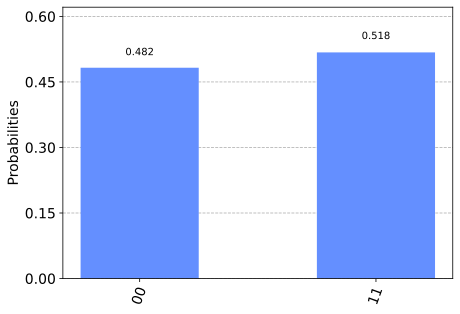

In [17]:
qc5.measure_all()
counts5 = execute(qc5, QasmSimulator()).result().get_counts()
plot_histogram(counts5)

## Quantum gates
Quantum gates perform the basic computational operations on qubits (think of as counterparts to classical and, +, and so on).

![Quantum gates](figures/quantum_gates.png)

- [Quantum instruction glossary](https://quantum-computing.ibm.com/docs/circ-comp/q-gates)
- [IBM Quantum Experience](https://quantum-computing.ibm.com/composer/ddfedca0eb599c89a1a38ee16be048a5)

## Interferenece
Interference allows us to increase the probability of getting the right answer and decrease the chance of getting the wrong one.

![Double Slit](figures/doubleslit.svg)

## Grover's algorithm: unstructured search problem
Suppose you are given a large list of  $N$  items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner  $w$. Think of each item in the list as a box of a particular color. Say all items in the list are gray except the winner  $w$, which is pink.

![Unstructured Search ](figures/unstructured_search.png)

## Grover's algorithm: Step 1
Step 1: The amplitude amplification procedure starts out in the uniform superposition  $|s\rangle$ , which is easily constructed from  $|s\rangle=H^{\otimes n}|0\rangle^n$.
![Grover step1](figures/grover_step1.png)

## Grover's algorithm: Step 2
Step 2: We apply the oracle reflection  $U_f$  to the state  $|s\rangle$.


![Grover step2](figures/grover_step2.png)

## Grover's algorithm: Step 3
Step 3: We now apply an additional reflection  $U_s$  about the state  $|s\rangle:  U_s=2|s\rangle \langle s | - \mathbb{1}$. This transformation maps the state to $U_s U_f |s\rangle$  and completes the transformation.

![Grover step3](figures/grover_step3.png)

## Generalized Grover's algorithm

![Grover's algorithm](figures/grover_algorithm.png)

After  $t$  steps we will be in the state  $|\psi\rangle$  where: $|\psi_t\rangle = (U_s U_f)^t |s\rangle$. After $O(\sqrt N)$ times, the probability of getting $|w\rangle$ is close to 100%.

## IBM Quantum Experience Circuit Composer Demo
- [Grover's algorithm 2-qubit, 1 iteration](https://quantum-computing.ibm.com/composer/b26c3fff8c5b0e3d25c52a787564bb0f)
- [Grover's algorithm 3-qubit, 1 iteration](https://quantum-computing.ibm.com/composer/5265039fd13daa3e363f4fd3157fa6ee)
- [Grover's algorithm 3-qubit, 2 iterations](https://quantum-computing.ibm.com/composer/3cf2c268c828e4316ccd9988745539d9)

## Qiskit Code Demo

In [18]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle 
from qiskit.providers.basicaer import QasmSimulatorPy

### Construct Grover's circuit

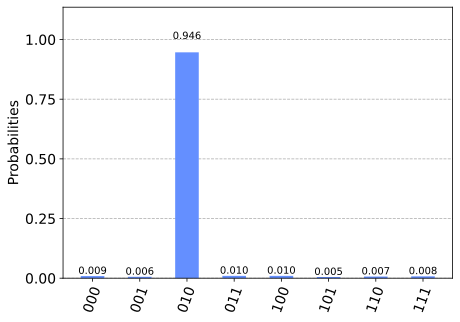

In [22]:
oracle = TruthTableOracle('00100000') # implement oracle using truth table
grover = Grover(oracle, num_iterations=2) # initialize Grover's algorithm with oracle and number of iterations
grover.set_backend(QasmSimulatorPy()) # set backend for running the algorithm
result = grover.run() # run Grover's algorithm
plot_histogram(result['measurement'])
#grover.construct_circuit(measurement=True).draw('mpl') # visualize the grover circuit

# Grover adaptive search

[Grover Optimizer tutorial](https://qiskit.org/documentation/tutorials/optimization/4_grover_optimizer.html)

## Qiskit education resources
- [Coding with Qiskit Youtube series](https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
- [Get started with IBM Quantum Experience](https://quantum-computing.ibm.com/docs/)
- [Qiskit textbook](https://qiskit.org/textbook/preface.html)
- [Qiskit Live](https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A/featured)
- [Qiskit Twitter](https://twitter.com/qiskit)
- [Qiskit Slack](http://ibm.co/joinqiskitslack)
- [IBM Quantum Challenge](https://www.ibm.com/blogs/research/2020/05/quantum-challenge-results/)


### Coding with Qiskit

In [20]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/a1NZC5rqQD8", width=1200, height=675)

### Qiskit Live

In [21]:
IFrame(src="https://www.youtube.com/embed/Omv-bPvQ3E8", width=1200, height=675)